In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import os
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [2]:
path = 'C:\\Users\\mine\\Music\Pandas-Data-Science-Tasks-master\Pandas-Data-Science-Tasks-master\SalesAnalysis\Sales_Data'
files = [file for file in os.listdir(path)]
zoom = pd.DataFrame()
for file in files:
    df = pd.read_csv(path + '/' + file)
    zoom = pd.concat([zoom, df])
    
    
zoom.to_csv('months_df.csv', index=False)

In [3]:
months = pd.read_csv('months_df.csv')
months.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


In [4]:
months = months.dropna()

In [5]:
months.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


In [6]:
months = months[months['Order Date'].str[0:2] != 'Or']
months.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


In [7]:
months['Months'] = months['Order Date'].str[0:2]
months['Months'] = months['Months'].astype('int32')

In [8]:
months['Quantity Ordered'] = months['Quantity Ordered'].astype(int)
months['Price Each'] = months['Price Each'].astype(float)

In [9]:
months['Sales'] = months['Quantity Ordered'] * months['Price Each']
months.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Months,Sales
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99


In [10]:
# what month has the highest sales? 

result = months.groupby('Months').sum()

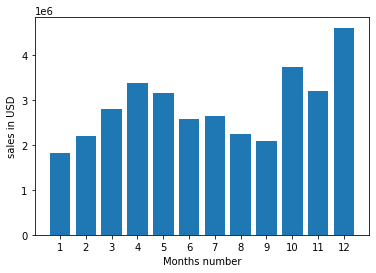

In [11]:
zoom = range(1,13)

plt.bar(zoom, result['Sales'])
plt.xticks(zoom)
plt.ylabel('sales in USD')
plt.xlabel('Months number')
plt.show()

In [12]:
def get_city(address):
    return address.split(",")[1].strip(" ")

def get_state(address):
    return address.split(",")[2].split(" ")[1]

months['City'] = months['Purchase Address'].apply(lambda x: f"{get_city(x)}  ({get_state(x)})")
months.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Months,Sales,City
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas (TX)
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston (MA)
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA)
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA)
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA)


In [13]:
# what city has the highest number of sales

zoom_1 = months.groupby('City').sum()
zoom_1

,Quantity Ordered,Price Each,Months,Sales
City,,,,
Atlanta (GA),16602,2779908.20,104794,2795498.58
Austin (TX),11153,1809873.61,69829,1819581.75
Boston (MA),22528,3637409.77,141112,3661642.01
Dallas (TX),16730,2752627.82,104620,2767975.40
Los Angeles (CA),33289,5421435.23,208325,5452570.80
New York City (NY),27932,4635370.83,175741,4664317.43
Portland (ME),2750,447189.25,17144,449758.27
Portland (OR),11303,1860558.22,70621,1870732.34
San Francisco (CA),50239,8211461.74,315520,8262203.91


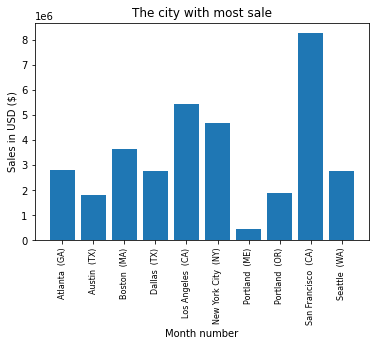

In [14]:
keys = [city for city, df in months.groupby(['City'])]

plt.bar(keys,months.groupby(['City']).sum()['Sales'])
plt.ylabel('Sales in USD ($)')
plt.xlabel('Month number')
plt.title('The city with most sale')
plt.xticks(keys, rotation='vertical', size=8)
plt.show()

In [15]:
# waht time should we display advertisment to have a high chance of buying a product

months['Order Date'] = pd.to_datetime(months['Order Date'])
months.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Months,Sales,City
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas (TX)
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston (MA)
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA)
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA)
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA)


In [16]:
# what product sold the most?

zoom_12 = months.groupby('Product').sum()
zoom_12

,Quantity Ordered,Price Each,Months,Sales
Product,,,,
20in Monitor,4129,451068.99,29336,454148.71
27in 4K Gaming Monitor,6244,2429637.70,44440,2435097.56
27in FHD Monitor,7550,1125974.93,52558,1132424.50
34in Ultrawide Monitor,6199,2348718.19,43304,2355558.01
AA Batteries (4-pack),27635,79015.68,145558,106118.40
AAA Batteries (4-pack),31017,61716.59,146370,92740.83
Apple Airpods Headphones,15661,2332350.00,109477,2349150.00
Bose SoundSport Headphones,13457,1332366.75,94113,1345565.43
Flatscreen TV,4819,1440000.00,34224,1445700.00


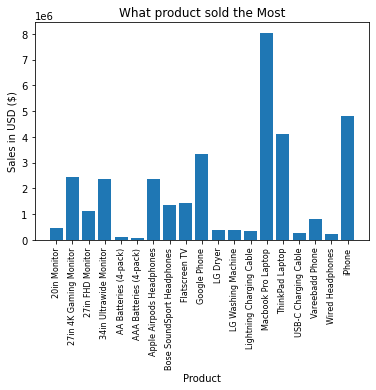

In [17]:
keys = [city for city, df in months.groupby(['Product'])]

plt.bar(keys,months.groupby(['Product']).sum()['Sales'])
plt.ylabel('Sales in USD ($)')
plt.xlabel('Product')
plt.title('What product sold the Most')
plt.xticks(keys, rotation='vertical', size=8)
plt.show()

In [18]:
months.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Months,Sales,City
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas (TX)
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston (MA)
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA)
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA)
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA)


In [19]:
refined = months.drop(['Order ID', 'Order Date', 'Purchase Address', 'Months', 'City'], axis = 1)
refined.head()

,Product,Quantity Ordered,Price Each,Sales
0,USB-C Charging Cable,2,11.95,23.90
2,Bose SoundSport Headphones,1,99.99,99.99
3,Google Phone,1,600.00,600.00
4,Wired Headphones,1,11.99,11.99
5,Wired Headphones,1,11.99,11.99


In [21]:
from sklearn.preprocessing import LabelEncoder
ohe = LabelEncoder()
refined['Product'] = refined[['Product']].apply(ohe.fit_transform)

In [22]:
refined.dtypes

Product               int32
Quantity Ordered      int32
Price Each          float64
Sales               float64
dtype: object

In [24]:
x = refined.drop('Sales', axis =1)
y = refined['Sales']

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=42, test_size=0.2)

In [25]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit_transform(x_train, x_test)

array([[ 1.08910907, -0.28013028, -0.51750672],
       [ 0.53190226, -0.28013028, -0.50849984],
       [ 1.08910907, -0.28013028, -0.51750672],
       ...,
       [-0.58251134, -0.28013028, -0.10304007],
       [-1.69692495, -0.28013028, -0.22316184],
       [ 0.53190226, -0.28013028, -0.50849984]])

In [26]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [27]:
y_pred = model.predict(x_test)
y_pred

array([ 150.08407279,   23.21472786, 1701.96829466, ...,  100.06580765,
         15.15314008,   15.15314008])

In [29]:
from sklearn.metrics import r2_score
print(r2_score(y_test, y_pred))

0.9985617329806458


In [ ]:
# this model has an accuracy of 99% in predicting the sales volume of these products